In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.disable_eager_execution()
warnings.filterwarnings('ignore')

# <b style="color:blue">Create Hyper-paremeter</b>
A hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training the data. For example, Neural Networks has many hyperparameters, including: number of hidden layers.

In [3]:
#run time step
time_step = 10
#input size
input_size = 1
#run cell size
cell_size = 32
# learning rate
learning_rate = 0.02

# <b style="color:red"> Create Fake Datasets to illustrate the Recurrent Neural Network for Regression </b>

In [4]:
steps = np.linspace(0, np.pi*2, 100, dtype = np.float32)
# the data type is float32 beacuse of converting numpy value to float Tensor

x_np = np.sin(steps)
y_np = np.cos(steps)

<b style="color:blue"> Plot the values </b>

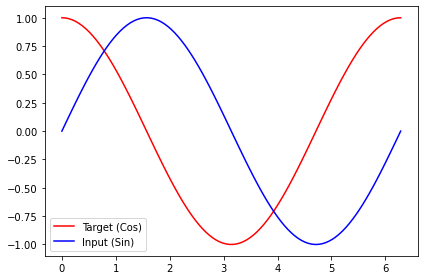

In [5]:
plt.plot(steps, y_np, 'r-', label = 'Target (Cos)')
plt.plot(steps, x_np, 'b-', label = 'Input (Sin)')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# <b style="color:blue"> Create Tensorflow Placeholders </b>

In [6]:
tf_x = tf.placeholder(tf.float32, [None, time_step, input_size])     # shape (batch, 5, 1)
tf_y = tf.placeholder(tf.float32, [None, time_step, input_size])     # input y

# <b style="color:blue"> Create Recurrent Neural Network (RNN) </b>

<b style="color:red">Before dive into code lets know something about RNN.</b>

A recurrent neural network (RNN) is a type of artificial neural network commonly used in speech recognition and natural language processing (NLP). RNNs are designed to recognize a data's sequential characteristics and use patterns to predict the next likely scenario.

RNNs are used in deep learning and in the development of models that simulate the activity of neurons in the human brain. They are especially powerful in use cases in which context is critical to predicting an outcome and are distinct from other types of artificial neural networks because they use feedback loops to process a sequence of data that informs the final output, which can also be a sequence of data . These feedback loops allow information to persist; the effect is often described as memory.

# <b style="color:'blue">How recurrent neural networks learn </b>
Artificial neural networks are created with interconnected data processing components that are loosely designed to function like the human brain. They are composed of layers of artificial neurons (network nodes) that  have the capability to process input and forward output to other nodes in the network. The nodes are connected by edges or weights that influence a signal's strength and the network's ultimate output.

<img src="https://qph.fs.quoracdn.net/main-qimg-5148d598f36b016d039e220bd3cab745.webp" alt =" RNN" >

In some cases, artificial neural networks process information in a single direction from input to output. These "feedforward" neural networks include convolutional neural networks that underpin image recognition systems . RNNs, on the other hand, can be layered to process information in two directions.

Like feedforward neural networks, RNNs can process data from initial input to final output. Unlike feedforward neural networks, RNNs use feedback loops such as Backpropagation Through Time or BPTT throughout the computational process to loop information back into the network. This connects inputs together and is what enables RNNs to process sequential and temporal data.



In [7]:
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units = cell_size)
init_s = rnn_cell.zero_state(batch_size = 1, dtype = tf.float32)

outputs, final_s = tf.nn.dynamic_rnn(rnn_cell,
                                    tf_x,                      # Input
                                    initial_state= init_s,      # The initial hidden Layers
                                    time_major= False)

In [8]:
outs_2D= tf.reshape(outputs, [-1, cell_size])
net_outs2D = tf.layers.dense(outs_2D, input_size)
outs = tf.reshape(net_outs2D, [-1, time_step, input_size])

loss = tf.losses.mean_squared_error(labels = tf_y, predictions=outs)
train_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

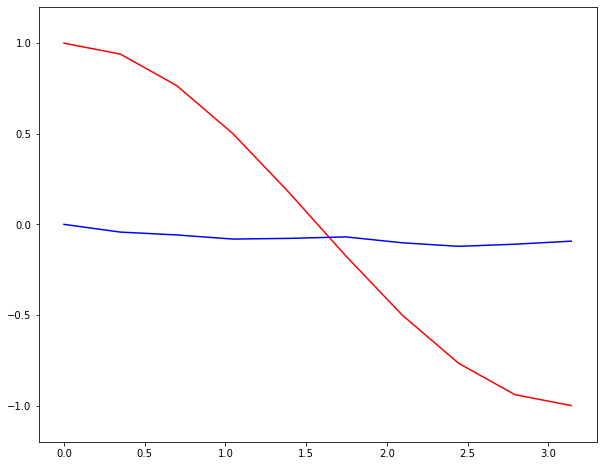

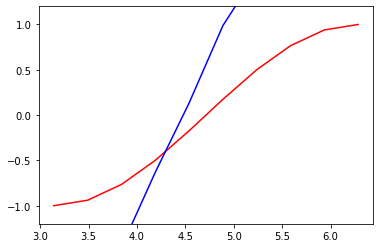

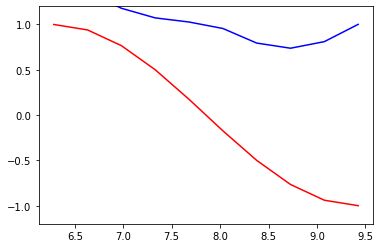

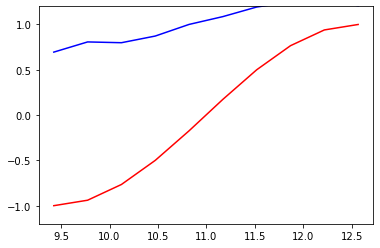

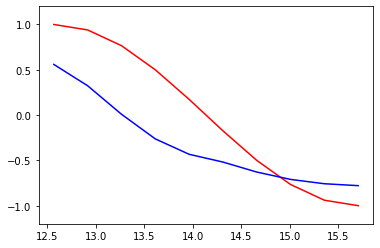

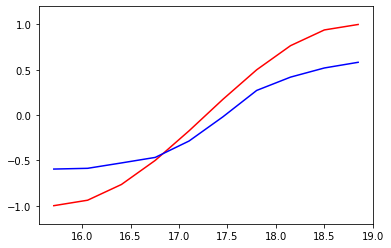

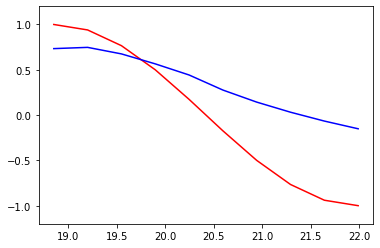

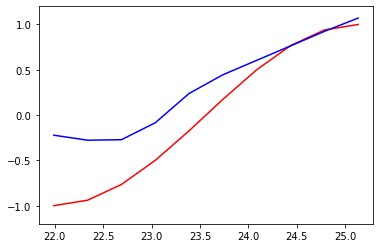

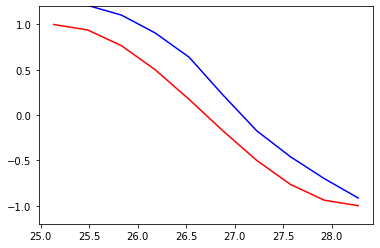

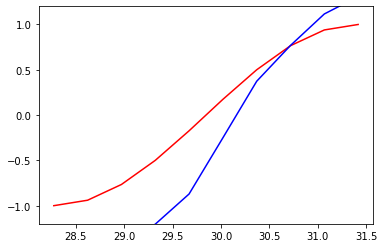

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(1, figsize=(10, 8))
plt.ion()

for step in range(10):
    start = step * np.pi
    end = (step + 1) * np.pi
    
    steps = np.linspace(start, end, time_step)
    
    x = np.sin(steps)[np.newaxis, :, np.newaxis]
    y = np.cos(steps)[np.newaxis, :, np.newaxis]
    
    if 'final_s_' not in globals():
        feed_dict = {tf_x:x, tf_y:y}
    else:
        feed_dict = {tf_x:x, tf_y:y, init_s:final_s_}
        
    _, pred_, final_s_ = sess.run([train_optimizer, outs, final_s], feed_dict)
    
    
    plt.plot(steps, y.flatten(), 'r-')
    plt.plot(steps, pred_.flatten(), 'b-')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.05)
    
    
plt.ioff()
plt.tight_layout()
plt.show()